# Stochastic Simulation Algorithm

In [3]:
from numpy.random import rand
import numpy as np, scipy
import matplotlib.pyplot as plt
from scipy.stats import poisson

## Question 2 - Gillespie Simulations of mRNA as a function of time

In [229]:
#----stoichoimetry vector-----

k0 = 0.2
k1 = 0.01

stoichiometry = [+1, -1]

def propensities(m): #m is starting concentration of mRNA
    return [k0, k1*m]

def reactiontimes(m):
    a = propensities(m)
    aInv = [ 1/s if s>0 else np.inf for s in a]
    return -np.log(rand(2))*aInv

propensities(0)

#---SSA stepper----

def ssa(m,tIn,tOut):
    #internal time
    t = tIn
    
    while t<tOut:
        rt = reactiontimes(m) #sample reaction times
        idx = np.argmin(rt) #pick the reaction corresponding to least reaction time
        m += stoichiometry[idx] #increment the state m based on the stoichiometry
        t += rt[idx] #increment time by difference in reaction times?
    
    return m

Text(0, 0.5, 'mRNA')

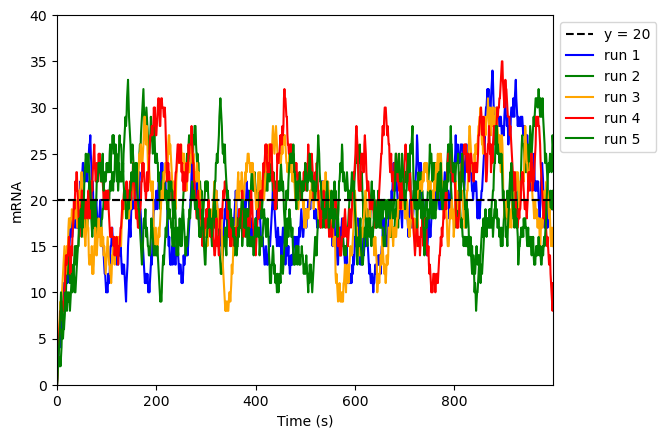

In [170]:
mrna = [[0], [0], [0], [0], [0]]#5 simulations
dt = 1 #time step
time = [0]

for i in mrna:
    for y in range(999):
        m = ssa(i[-1],time[-1],time[-1]+dt)
        i.append(m)
    time = [0]

time = np.arange(0, 1000, 1)

plt.plot(time, np.full_like(time, 20), 'k--', label='y = 20') 
plt.plot(time, mrna[0], color='blue', label='run 1')
plt.plot(time, mrna[1], color='green', label='run 2')
plt.plot(time, mrna[2], color='orange', label='run 3')
plt.plot(time, mrna[3], color='red', label='run 4')
plt.plot(time, mrna[4], color='green', label='run 5')
plt.plot(time, np.full_like(time, 20), 'k--') 

plt.xlim(0, max(time))  # Set x-limits to the data range
plt.ylim(0, 40)

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.xlabel("Time (s)")
plt.ylabel("mRNA")

## Question 3 - Estimating Fano factor of mRNA simulations

In [172]:
fano_values = []
for run in mrna:
    mean = np.mean(run[50:])
    var = np.var(run[50:])
    fano = var/mean
    fano_values.append(fano)
    
mean_fano = np.mean(fano_values)
print(fano_values, mean_fano)

[1.1907378829831088, 0.8361937001931232, 1.016377223302873, 0.9595441908125554, 0.807464114832536] 0.9620634224248393


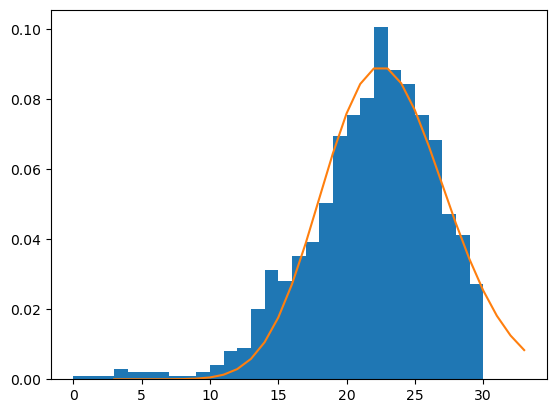

In [92]:
mu = k0/k1

plt.figure()
plt.hist(mrna[0],bins=range(0,max(mrna[0])),density=True)
m = np.arange(0,max(mrna[0]))
plt.plot(m+3, poisson.pmf(m, mu))

## Question 4 - Protein dynamics simulations

In [241]:
#----stoichoimetry vector-----
stoichiometry = [
    [+1, 0],   # mRNA transcription
    [-1, 0],   # mRNA degradation
    [0, +1],   # Protein translation
    [0, -1]    # Protein degradation
]

def propensities(m,p, k0, k1, k2, k3): #states for m=mrna, p= protein
    return [k0, k1*m, k2*m, k3*p] 

def reactiontimes(m,p, k0, k1, k2, k3): #accounts for all reactions due to their probabilities for occurring
    a = propensities(m,p, k0, k1, k2, k3) #a will contain propensities for all reactions
    aInv = [ 1/s if s>0 else np.inf for s in a] #inverts all propensities
    return -np.log(rand(4))*aInv #samples choice of reaction and time interval for that reaction - 4 numbers for 4 reactions


#-----SSA stepper-----

def ssa(m, p, tIn, tOut, k0, k1, k2, k3):
    t = tIn
 
    while t<tOut:
        rt = reactiontimes(m,p, k0, k1, k2, k3) #sample reaction times
        idx = np.argmin(rt) #pick the reaction corresponding to least reaction time
        m += stoichiometry[idx][0]  # Change in mRNA
        p += stoichiometry[idx][1] #change in protein
        t += rt[idx] #increment time by difference in reaction times?
    
    return m,p

#-----SSA loop-----
dt = 1 #time step
mRNA = [0]
protein = [0]
time = [0] 
for i in range(1000):
    x = ssa(mRNA[-1], protein[-1], time[-1],time[-1]+dt, 0.2, 0.01, 5, 1)
    time.append(time[-1]+dt)
    mRNA.append(x[0])
    protein.append(x[1])


Text(0, 0.5, 'mRNA')

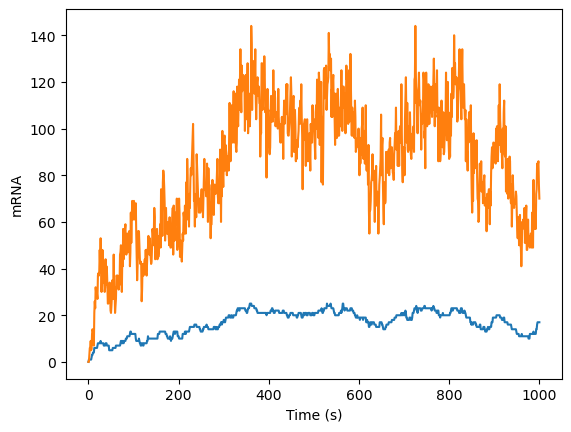

In [211]:
#----mRNA & protein plot----
plt.plot(time, mRNA)
plt.plot(time, protein)
plt.xlabel("Time (s)")
plt.ylabel("mRNA")

In [213]:
p_mean = np.mean(protein[200:])
p_var = np.var(protein[200:])
p_fano = p_var/p_mean
print(p_mean, p_var, p_fano)

93.32334581772784 416.6757221388371 4.4648605178885985


## Question 5 - Varying transcription rates

In [ ]:
#----sampling random transcription rates----
randomsamples = np.exp(np.random.uniform(np.log(0.0002), np.log(2), size=300))#random numbers of varying orders of magnitude
randomsamples = np.sort(randomsamples)

#----carrying out simulation----

dt = 1 #time step
time = [0] 

m_total = np.empty((0, 1000))  
p_total = np.empty((0, 1000)) 

for k in randomsamples:
    m = np.array([0])
    p = np.array([0])
    t = np.array([0])
    
    for i in range(999):
        x = ssa(m[-1], p[-1], time[-1],time[-1]+dt, k, 0.01, 5, 1)
        t = np.append(t, t[-1]+dt)
        m = np.append(m, x[0])
        p = np.append(p, x[1])
        
    
    m_total = np.vstack([m_total, m.reshape(1, -1)])
    p_total = np.vstack([p_total, p.reshape(1, -1)])


In [331]:


m_mean = np.mean(m_total, axis=1) #mean
p_mean = np.mean(p_total, axis=1)

m_var = np.var(m_total, axis=1) #variance
p_var = np.var(p_total, axis=1)

m_std = np.std(m_total, axis=1) #standard deviation
p_std = np.std(p_total, axis=1)

m_cv = np.divide(m_std, m_mean) # coefficient of variation = sd/mean
p_cv = np.divide(p_std, p_mean)




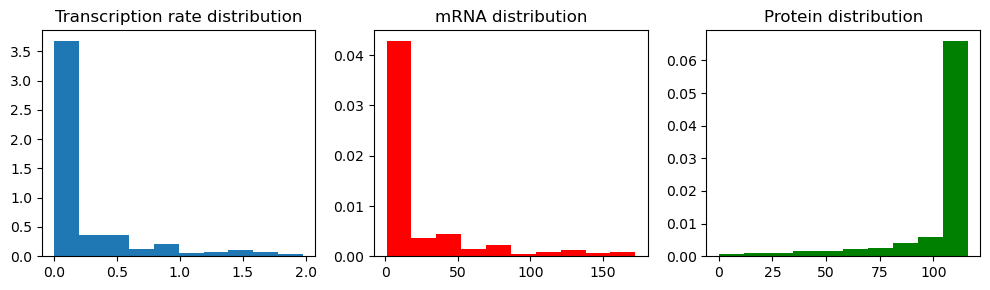

In [299]:
#----Distributions of transcription rates on  mRNA and protein expression levels

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(10, 3))

ax1.hist(randomsamples, bins=10, density=True)
ax1.set_title('Transcription rate distribution')
ax2.hist(m_mean, bins=10, density=True, color='red')
ax2.set_title('mRNA distribution')
ax3.hist(p_mean, bins=10, density=True)
ax3.set_title('Protein distribution')

plt.tight_layout()

Text(0.5, 1.0, 'Protein')

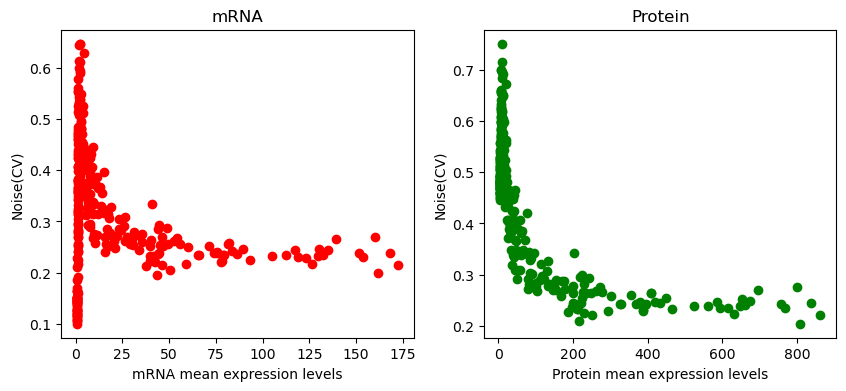

In [327]:
#----Scatter plots of noise vs mean relationships in mRNA and protein
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10, 4))
ax1.scatter(m_mean, m_cv, color='red')
ax1.set_xlabel('mRNA mean expression levels')
ax1.set_ylabel('Noise(CV)')
ax1.set_title('mRNA')

ax2.scatter(p_mean, p_cv, color='green')
ax2.set_xlabel('Protein mean expression levels')
ax2.set_ylabel('Noise(CV)')
ax2.set_title('Protein')